<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/Exercises/Movie_Reviews_Binary_Classification_20Epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The IMDB dataset**

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
train_data

In [0]:
train_labels[2]

**Decoding one of the reviews train_data[0] into actual review from numbers**

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value,key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


**Preparing the data**
We have list of numbers. For neural networks we need those lists into **tensors**. 

```The example bellow is a vectorization of the data with One-hot encoding.```

In [0]:
import numpy as np
test = np.zeros((len(train_data),10000))

In [0]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [34]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

**Building the network**, model definition


1.   Input data is vectors
2.   Labels are scalars



In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**Compiling the model**

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Validation set** to monitor the accuracy of the model during training 

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [47]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.5348 - acc: 0.7943 - val_loss: 0.4216 - val_acc: 0.8570
Epoch 2/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.3319 - acc: 0.9010 - val_loss: 0.3220 - val_acc: 0.8848
Epoch 3/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.2412 - acc: 0.9262 - val_loss: 0.2914 - val_acc: 0.8867
Epoch 4/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1893 - acc: 0.9381 - val_loss: 0.2755 - val_acc: 0.8893
Epoch 5/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1552 - acc: 0.9509 - val_loss: 0.2757 - val_acc: 0.8888
Epoch 6/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1299 - acc: 0.9604 - val_loss: 0.2840 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 2s 146us/step - 

In [49]:
history_dict = history.history
history_dict.keys()
[u'acc',u'loss',u'val_acc',u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

**Plotting the training and validation loss**

*   Obvious overfitting.
*   Can change this if we use epochs=3, because there is the tweaks for overfitting



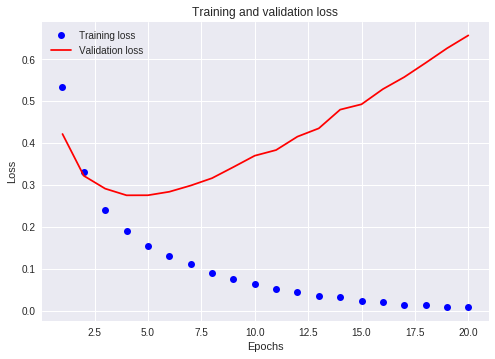

In [55]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Plotting the training and validation accuracy**

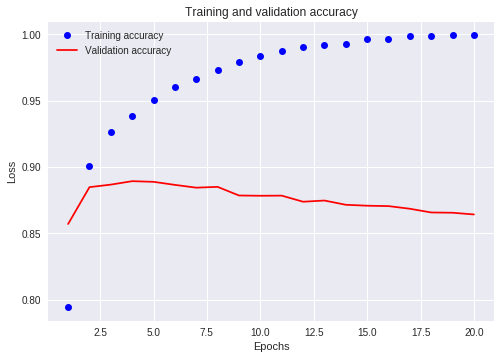

In [56]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

